Vytvoření složky pro model
Načtení datasetu do datového rámce pomocí pandas
Příprava dat
Analýza datasetu pomocí knihovny seaborn
Vyvážení dat
Rozdělení na trénovací a testovací data
Formátování dat pro klasifikační úlohu
Vytvoření klasifikátoru
Příprava várek pro trénink
Trénink klasifikátoru
Evaluace klasifikátoru
Byznys analýza dat pomocí vizualizace a kontingenčních tabulek

In [1]:
import pandas as pd
import spacy
import seaborn as sns

ModuleNotFoundError: No module named 'spacy'

In [2]:
hotel = pd.read_csv("Hotel_Reviews.csv")

In [ ]:
hotel.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397.0,1403.0,Only the park outside of the hotel was beauti...,11.0,7.0,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0.0,1403.0,No real complaints the hotel was great great ...,105.0,7.0,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42.0,1403.0,Location was good and staff were ok It is cut...,21.0,9.0,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210.0,1403.0,Great location in nice surroundings the bar a...,26.0,1.0,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140.0,1403.0,Amazing location and building Romantic setting,8.0,3.0,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [ ]:
hotel.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                  float64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts             float64
Total_Number_of_Reviews                       float64
Positive_Review                                object
Review_Total_Positive_Word_Counts             float64
Total_Number_of_Reviews_Reviewer_Has_Given    float64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

In [ ]:
hotel.columns

In [ ]:
nlp = spacy.load("en_core_web_md")
print(nlp)

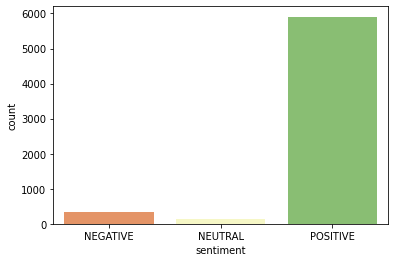

In [ ]:
hotel["sentiment"] = pd.cut(hotel["Reviewer_Score"], 
                   bins=[0,4.9,5,10], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
sns.countplot(x="sentiment", data=hotel, palette="RdYlGn");

In [ ]:
indicies_to_drop = hotel[hotel.sentiment == "NEUTRAL"].index

In [ ]:
hotel = hotel.drop(indicies_to_drop)

hotel.groupby("sentiment").count()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
sentiment,,,,,,,,,,,,,,,,,
NEGATIVE,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344,344
NEUTRAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
POSITIVE,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907,5907


CategoricalDtype(categories=['NEGATIVE', 'POSITIVE'], ordered=True)

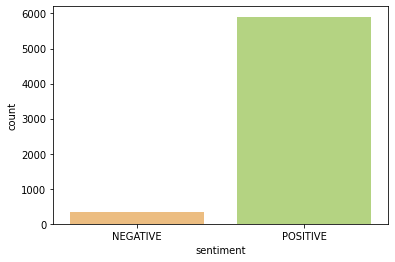

In [ ]:
hotel.sentiment = hotel.sentiment.cat.remove_unused_categories() #odstrani tu prazdnou neutral kategorii!
sns.countplot(x="sentiment", data=hotel, palette="RdYlGn")
hotel.sentiment.dtype

In [ ]:
hotel.groupby("sentiment")["Reviewer_Score"].count()

sentiment
NEGATIVE     344
POSITIVE    5907
Name: Reviewer_Score, dtype: int64

In [ ]:
# vyvážení dat

In [ ]:
hotel_neg = hotel[hotel.sentiment=="NEGATIVE"]
hotel_pos = hotel[hotel.sentiment=="POSITIVE"]

In [ ]:
hotel_pos = hotel_pos.sample(500)